# Prueba Intertrimestral

**Nombre:** Amaia 
**Apellidos:** Rotaeche Montero 

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [87]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [54]:
def imc(weight, height): #(kg,m)
   
    return round(weight / (height ** 2), 2)

In [55]:
imc(55,1.65)

20.2

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [56]:
def saludable(imcValue):
    if imcValue < 0:
        return "El índice IMC no puede ser negativo"
    elif imcValue < 18.5:
        return "Bajo peso"
    elif imcValue <= 24.9:
        return "Saludable"
    else:
        return "Sobrepeso"


In [57]:
saludable(18)

'Bajo peso'

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [58]:
# Genero datos aleatorios
np.random.seed(42)
weights = np.random.uniform(50, 150, 10)
heights = np.random.uniform(1.5, 2.2, 10)

# Cálculo de IMC y categoría
imcs=[]
categorias_imc=[]
for w,h in zip(weights,heights):
    imcs.append(imc(w,h))
for imc in imcs:
    categorias_imc.append(saludable(imc))


# DataFrame
imcData = pd.DataFrame({
    'peso': weights,
    'altura': heights,
    'imc': imcs,
    'categoria': categorias_imc
})


print(imcData.head())

print("Nulos")
print(imcData.isnull().sum())
print("\nNa:")
print(imcData.isna().sum())
print("\nTipos de datos:")
print(imcData.dtypes)


         peso    altura    imc  categoria
0   87.454012  1.514409  38.13  Sobrepeso
1  145.071431  2.178937  30.56  Sobrepeso
2  123.199394  2.082710  28.40  Sobrepeso
3  109.865848  1.648637  40.42  Sobrepeso
4   65.601864  1.627277  24.77  Saludable
Nulos
peso         0
altura       0
imc          0
categoria    0
dtype: int64

Na:
peso         0
altura       0
imc          0
categoria    0
dtype: int64

Tipos de datos:
peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [59]:
class HealthTools:
    def __init__(self, weights, heights):
        self.weights = weights
        self.heights = heights

    def imc(self, weight, height):
        return round(weight / (height ** 2), 2)

    def saludable(self, imcValue):
        if imcValue < 0:
            return "El índice IMC no puede ser negativo"
        elif imcValue < 18.5:
            return "Bajo peso"
        elif imcValue <= 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"

    def generar_dataframe(self):
        # Cálculo de IMC y categoría
        imcs=[]
        categorias_imc=[]
        for w,h in zip(self.weights,self.heights):
            imcs.append(self.imc(w,h))
        for imc in imcs:
            categorias_imc.append(self.saludable(imc))
        
        df = pd.DataFrame({
            'peso': self.weights,
            'altura': self.heights,
            'imc': imcs,
            'categoria': categorias
        })
        return df


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [60]:
lifeStyleData = pd.read_csv('Final_Data.csv')

print("5 primeras filas del dataset:")
display(lifeStyleData.head())

print("\n (Número de filas, número de columnas):")
print(lifeStyleData.shape)

5 primeras filas del dataset:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low



 (Número de filas, número de columnas):
(20000, 54)


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [69]:
def describeData(dataFrame):

    resumen = pd.DataFrame({
        'Tipo de dato': dataFrame.dtypes,
        'Nulos': dataFrame.isnull().sum(),
        'Porcentaje_nulos (%)': (dataFrame.isnull().mean() * 100)
    })
   
    return resumen

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [70]:
resumen_df = describeData(lifeStyleData)
resumen_ordenado=resumen_df.sort_values(by='Nulos', ascending=False)
display(resumen_ordenado)

,Tipo de dato,Nulos,Porcentaje_nulos (%)
cholesterol_mg,float64,1,0.005
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
Age,float64,0,0.000
Type of Muscle,object,0,0.000
rating,float64,0,0.000
Name of Exercise,object,0,0.000
Sets,float64,0,0.000
Reps,float64,0,0.000
Benefit,object,0,0.000


Las variables con más valores nulos son cholesterol_mg, Max_BPM y Avg_BPM, siendo las únicas con únicamente 1 valor nulo. El resto de variables del dataframe tienen todos los valores.

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

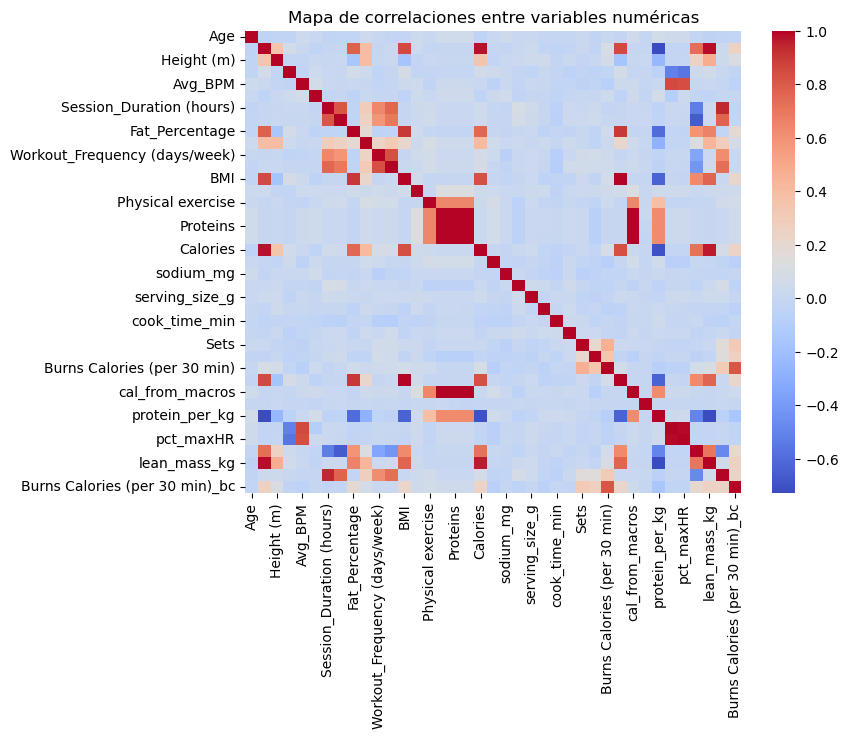

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(lifeStyleData.corr(numeric_only=True), cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()

Según lo obtenido, las variables más correladas con el BMI son:
- la altura
- el porcentaje de grasa
- las calorías
- proteinas por kg (negativamente)
- la masa magra (lean mass)
 

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [78]:
targetVar = "BMI"
vars_predictoras = ["Fat_Percentage", "protein_per_kg", "Calories"] 

X = lifeStyleData[vars_predictoras]
y = lifeStyleData[targetVar]


b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [81]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n Resultados de regresión lineal: ")
print(f"R²:  {r2:.3f}")
print(f"MSE: {mse:.3f}")



 Resultados: 
R²:  0.866
MSE: 6.063


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [91]:
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\n Resultados de Random Forest Regressor")
print(f"R²:  {r2_rf:.3f}")
print(f"MSE: {mse_rf:.3f}")




 Resultados de Random Forest Regressor
R²:  0.253
MSE: 0.176


El modelo random forest tiene un R2 mayor (0,911>0,866) y un menor MSE (4,052<6,063), luego el Random Forest tiene mejor rendimiento.

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [84]:
lifeStyleData['bmiHealthy'] = lifeStyleData['BMI'].apply(lambda x: 1 if 18.5 <= x <= 24.9 else 0)

display(lifeStyleData[['BMI', 'bmiHealthy']].head())


,BMI,bmiHealthy
0,24.87,1
1,23.48,1
2,21.15,1
3,32.45,0
4,14.83,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [85]:
predictoras = ["Resting_BPM", "Physical exercise", "Calories"] 
X = lifeStyleData[predictoras]
y = lifeStyleData['bmiHealthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.



 Exactitud del modelo: 0.572


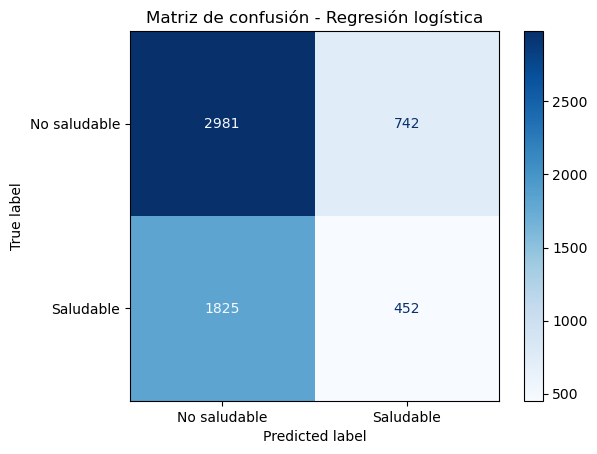

In [88]:
y_pred = log_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n Exactitud del modelo: {acc:.3f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No saludable", "Saludable"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Regresión logística")
plt.show()

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [90]:
coeficientes = pd.DataFrame({
    'Variable': predictoras,
    'Coeficiente': log_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nVariables ordenadas por importancia")
display(coeficientes)


Variables ordenadas por importancia


,Variable,Coeficiente
1,Physical exercise,0.053700
2,Calories,-0.001204
0,Resting_BPM,-0.012088


Según la matriz de confusión, aunque el modelo no es muy exacto, este predice mejor aquellos hábitos no saludables y falla considerablemente en los casos saludables, en función de las variables seleccionadas. En este, la variable que parece más influyente, con una relación positiva es el ejercicio físico. En definitiva, teninedo en cuenta ambas cosas, si no haces ejercicio físico es muy probable que el bmiHealthy valga 0, y tus hábitos no sean saludables.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



El análisis llevado a cabo permite sacar conclusiones.

En primer lugar, la matriz de correlación nos indica que además de las directamente relacionadas con el BMI (peso y altura), las variables que más influyen en el estado de salud, determinado por el coeficiente IMC, son aquellas que informan sobre la composición corporal del individuo: porcentaje de grasa corporal, masa magra y las referentes a la ingesta: calorías, proteins.

Tras el modelado, usando  Fat_Percentage", "protein_per_kg" y "Calories" como variables predictoras, se obtienen dos modelos de regresión lineal y random forest con un alto rendimiento, siendo ligeramente mejor el random Forest (captura relaciones no lineales). Luego estas variables son altamente relacionables con los hábitos saludables.

Por último, la clasificación confirma que la falta de ejercicio físico favorece a una vida NO saludable.

Si se contara con más tiempo o datos, podrían mejorarse los resultados incluyendo nuevas variables como el estrés, poniendo foco en algunos valores atípicos que pudiesen alterar el modelo, aplicando modelos más avanzados y combianando nuevas opciones de variables en los modelos 
